In [1]:
import pandas as pd
from Fig_2 import get_dataset, plot_freq, plot_sent, plot_others, main, get_headlines, format_float, int_to_date
import warnings
warnings.filterwarnings('ignore')

var_list = ['Co', 'Gom', 'Env', 'Epg', 'Bbl', 'Rpc', 'Ep']
df_all = pd.read_csv('/shared/share_mamaysky-glasserman/energy_drivers/2023/DataProcessing/concat/date_fixed_article_level_measures.csv')

In [2]:
dataset = pd.read_stata('transformed_data_prices_v19.2_mod.dta')
for var in var_list:
    twoMostNegativeChangesIndex = dataset[f's{var}_Fri'].diff().nsmallest(3).index
    twoMostNegativeChangesDate = dataset['date_Wed'][twoMostNegativeChangesIndex]
    print([int(date.strftime('%Y%m%d')) for date in twoMostNegativeChangesDate.to_list()])

[20020410, 20000913, 20000920]
[20100616, 19990714, 20060809]
[20100505, 20100616, 20050831]
[20150325, 20150902, 20150624]
[20021009, 20010314, 20021204]
[20190821, 20190814, 20190828]
[20110316, 20020123, 20020130]


# original series

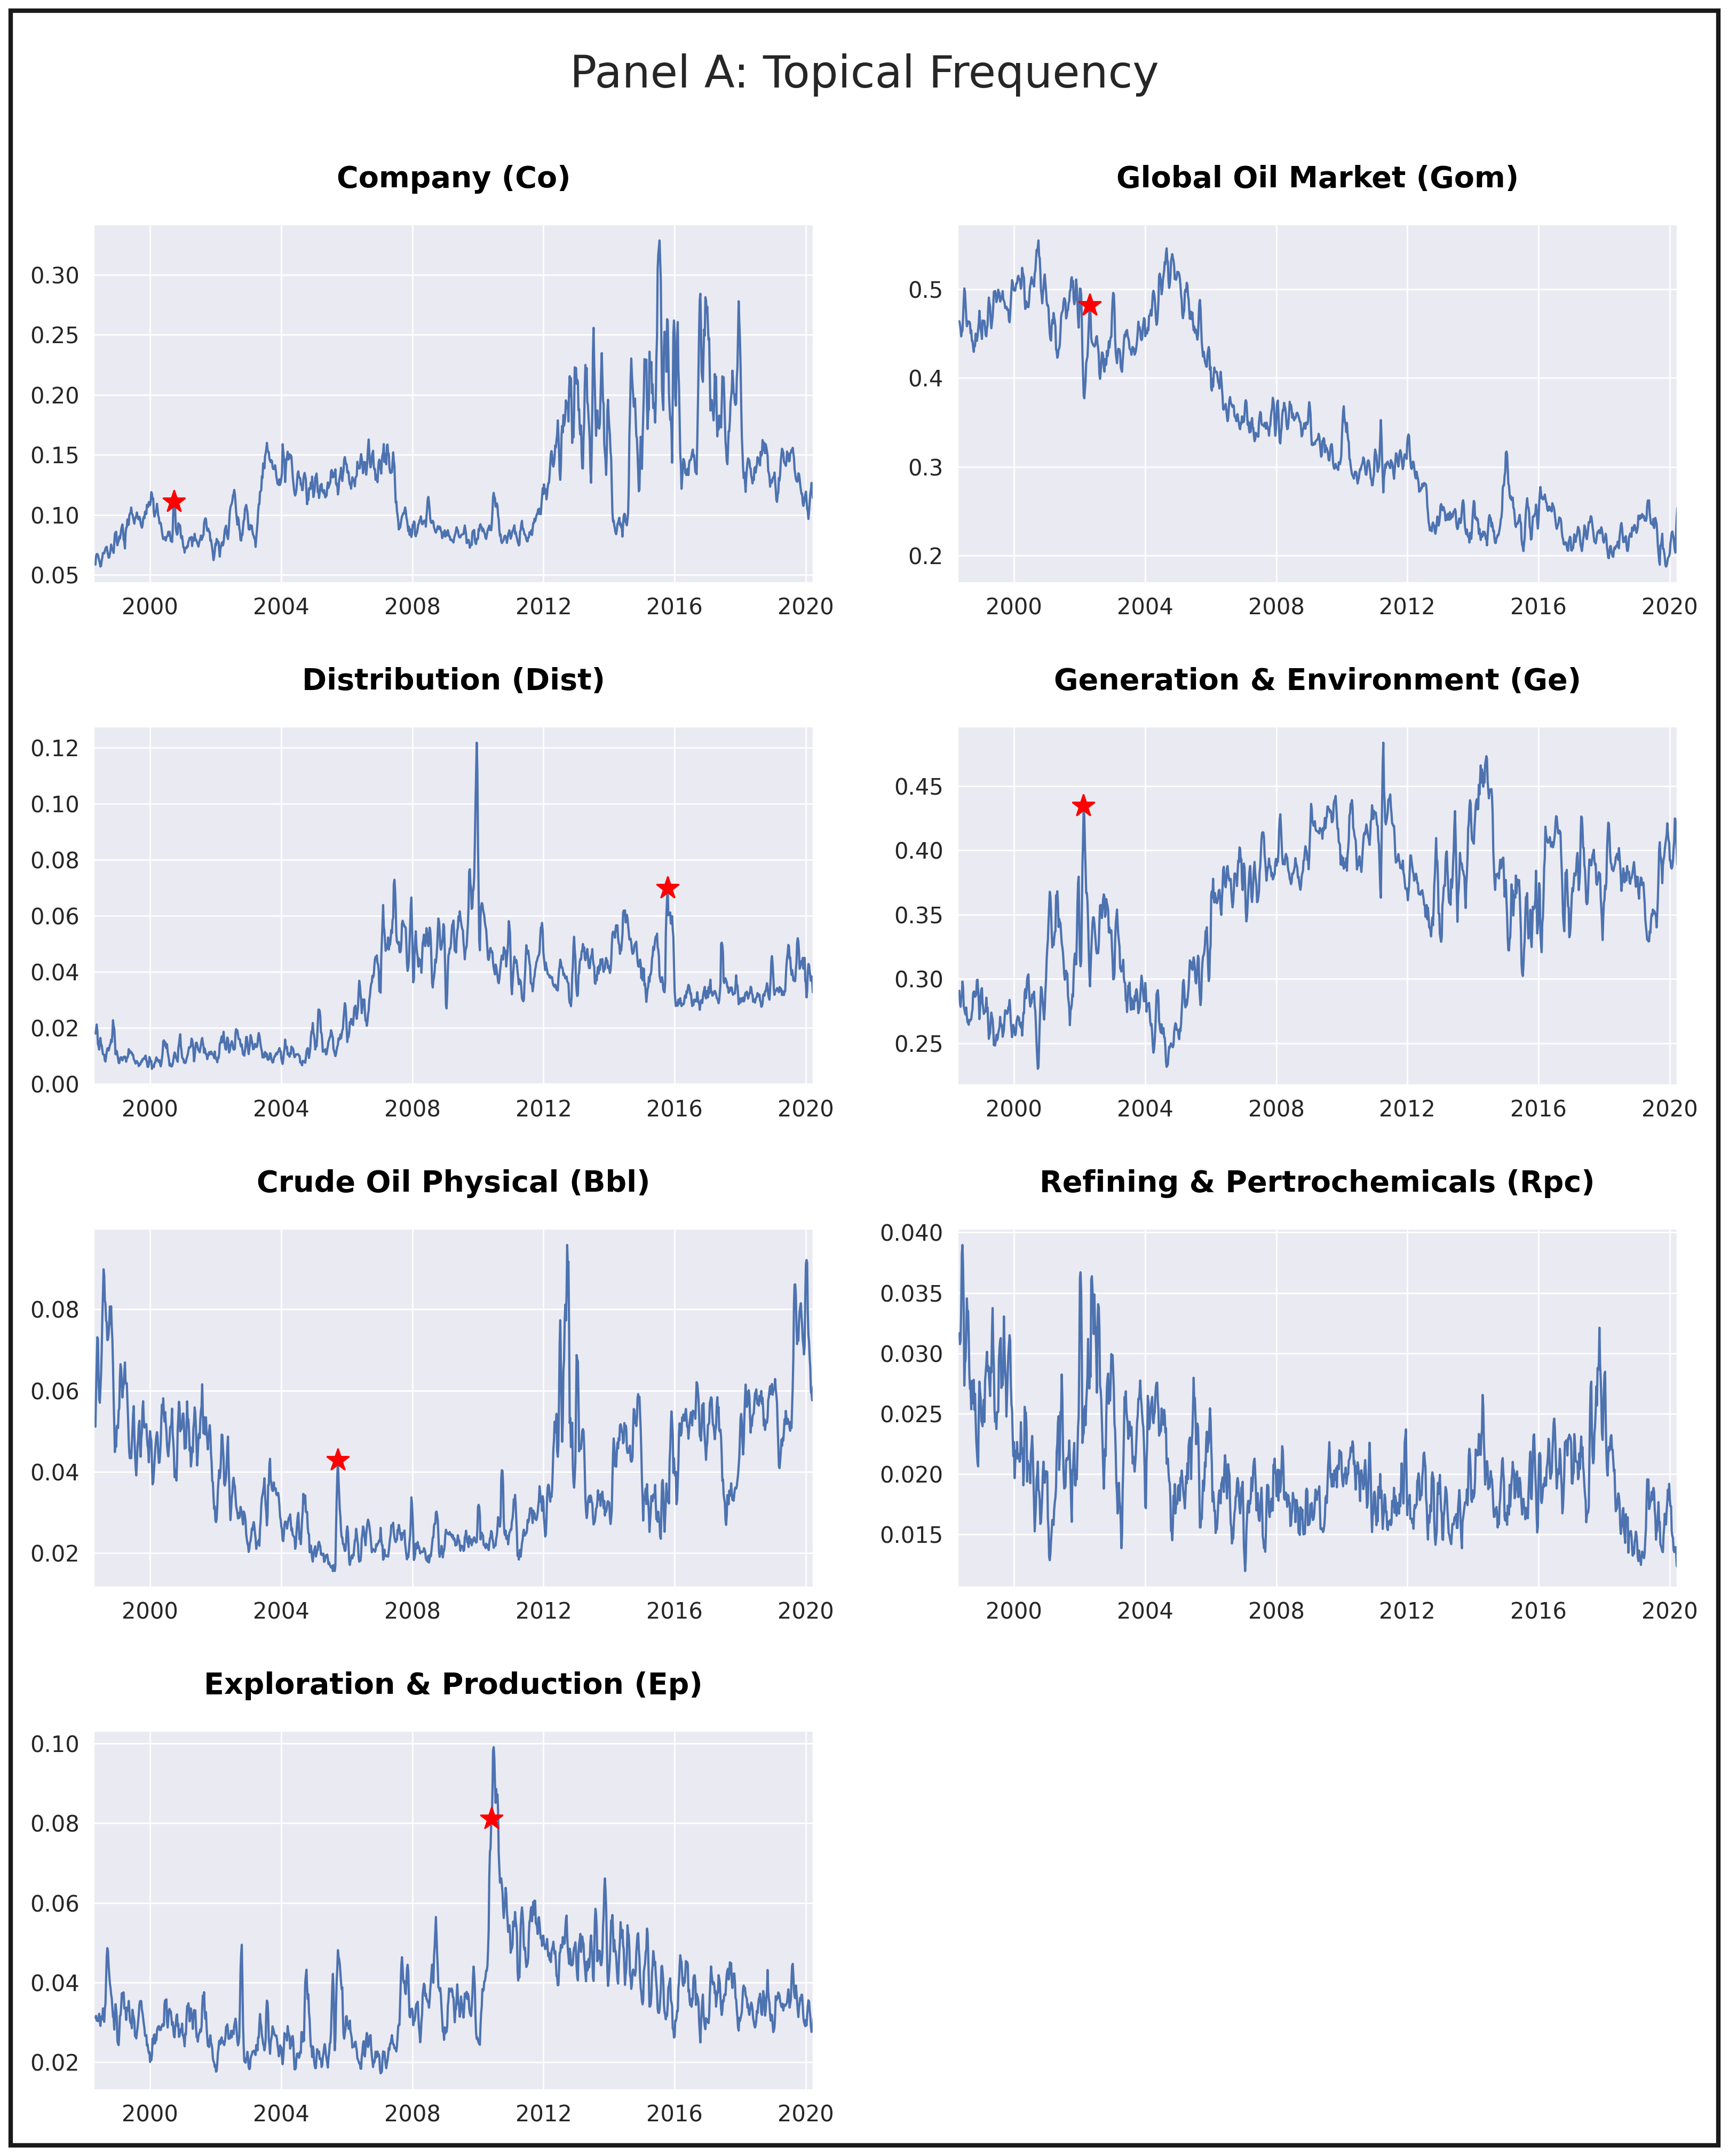

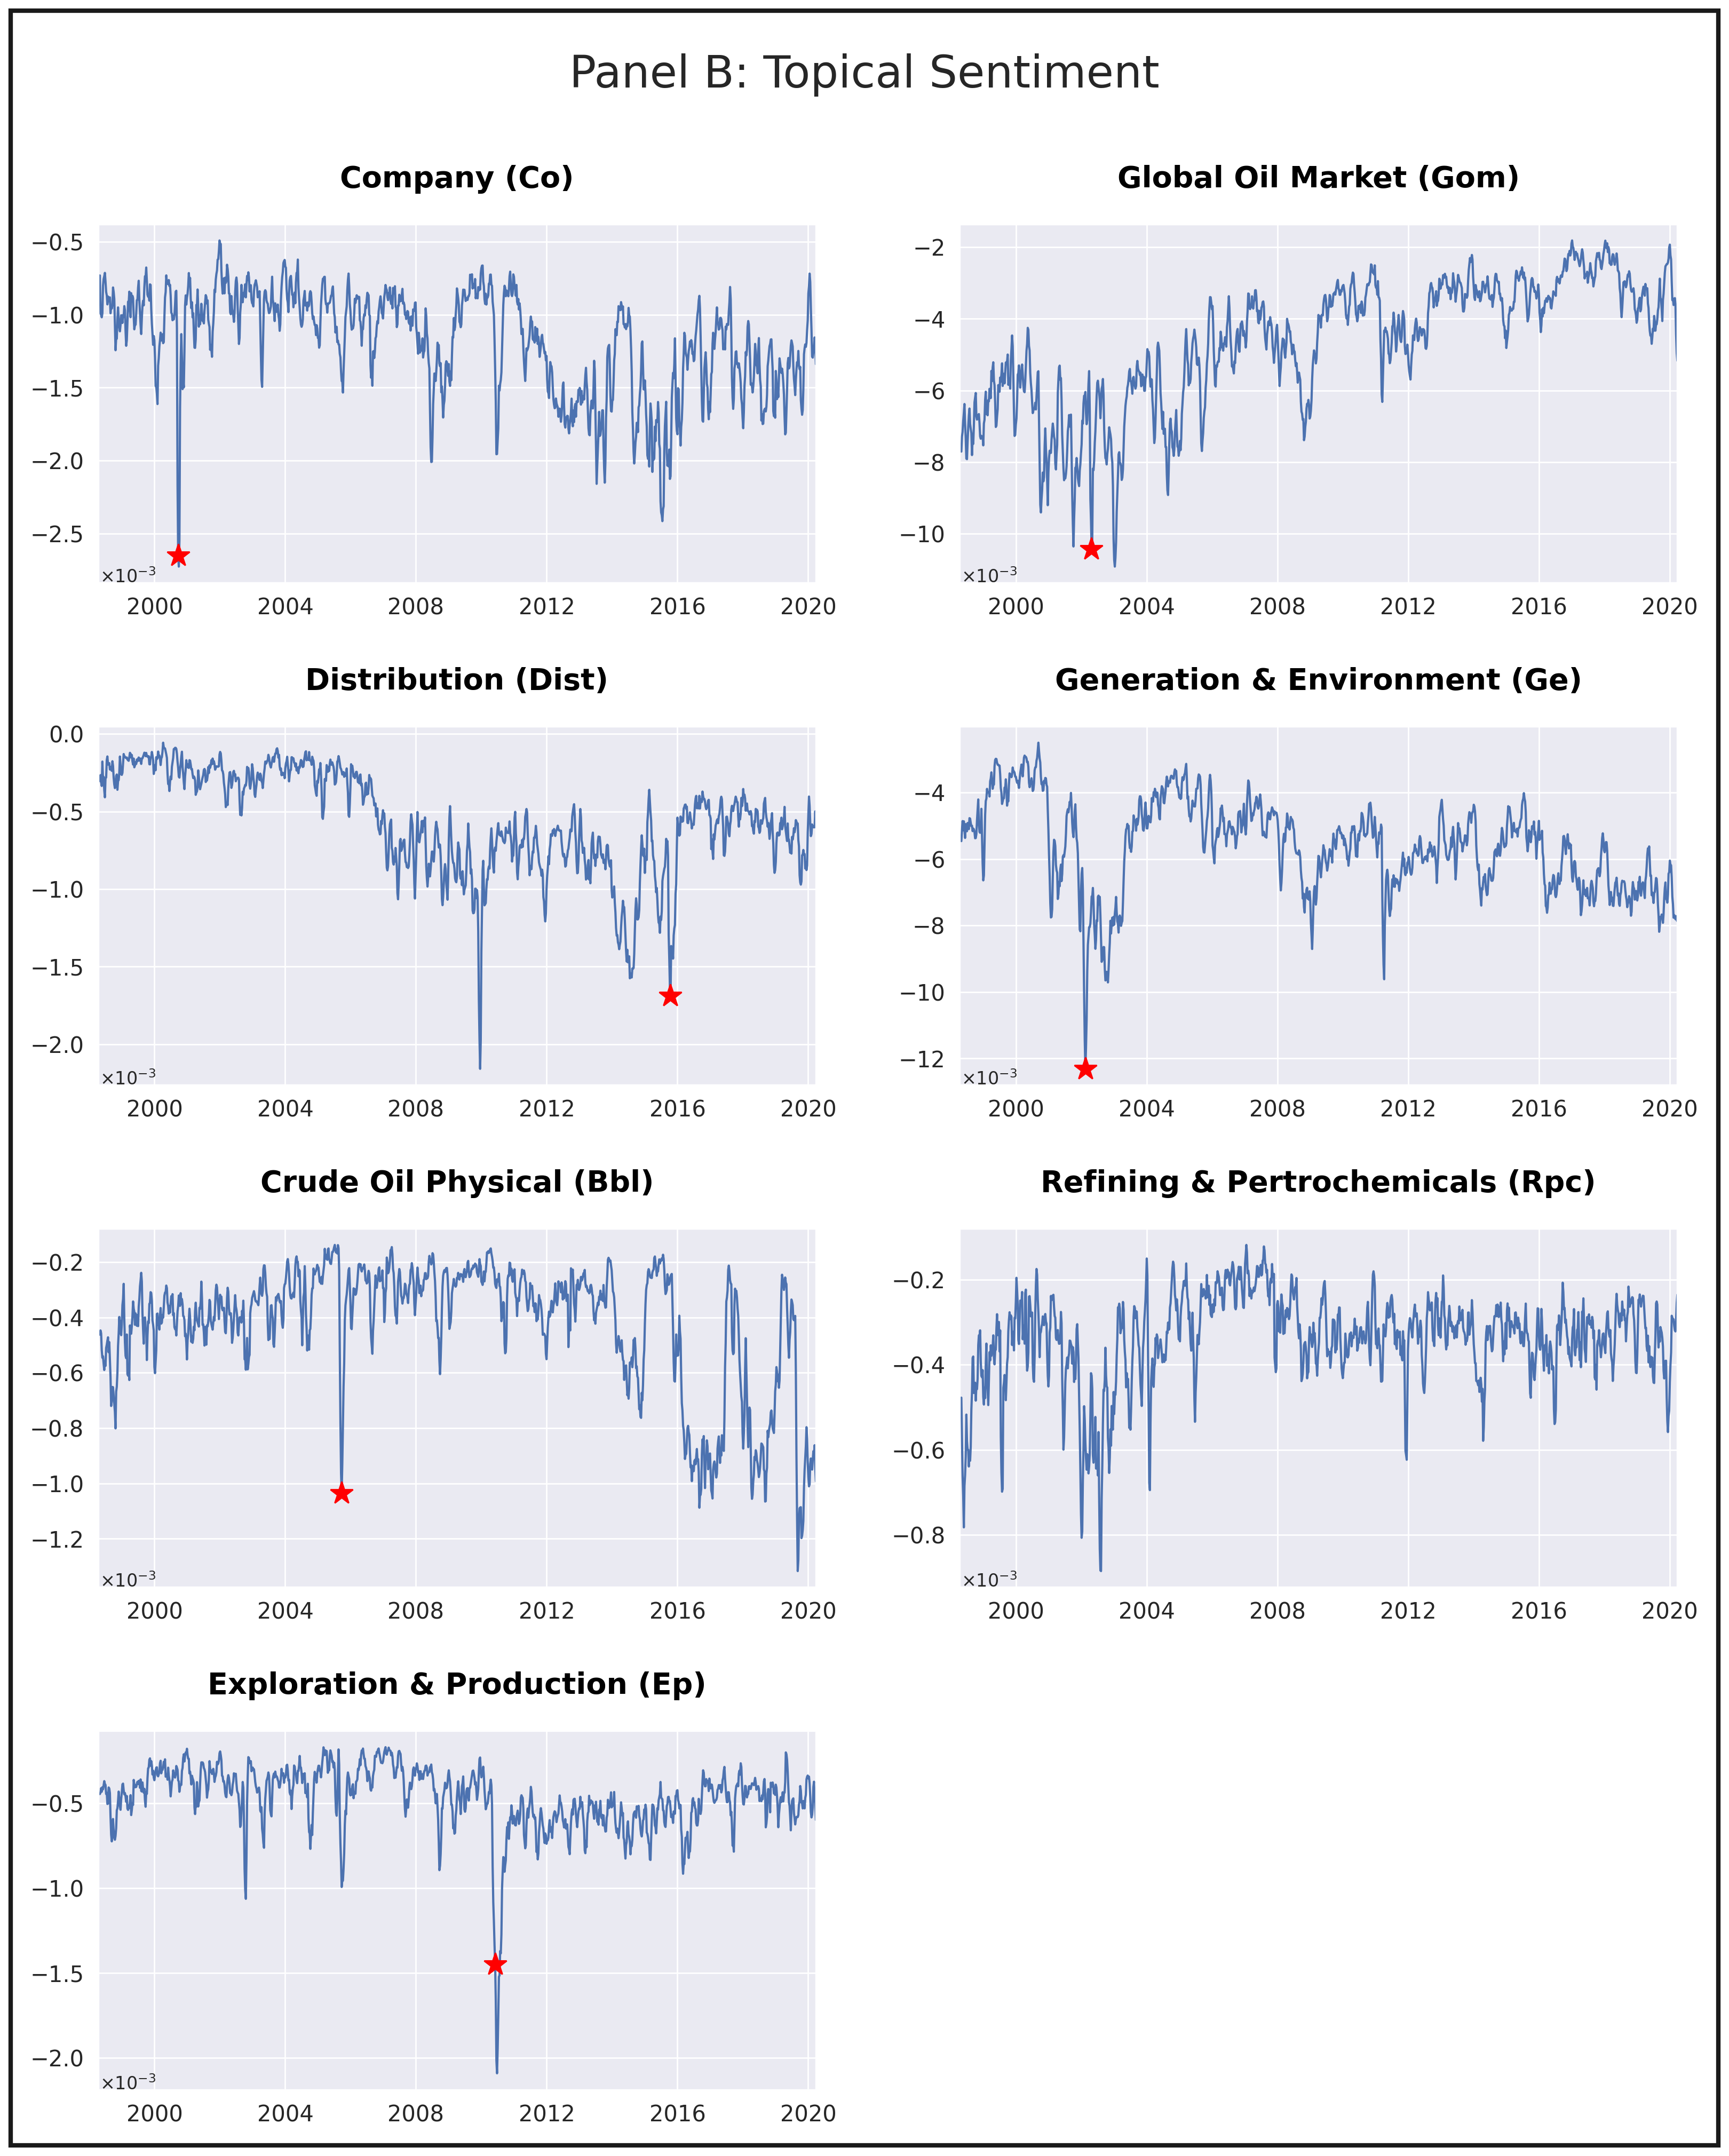

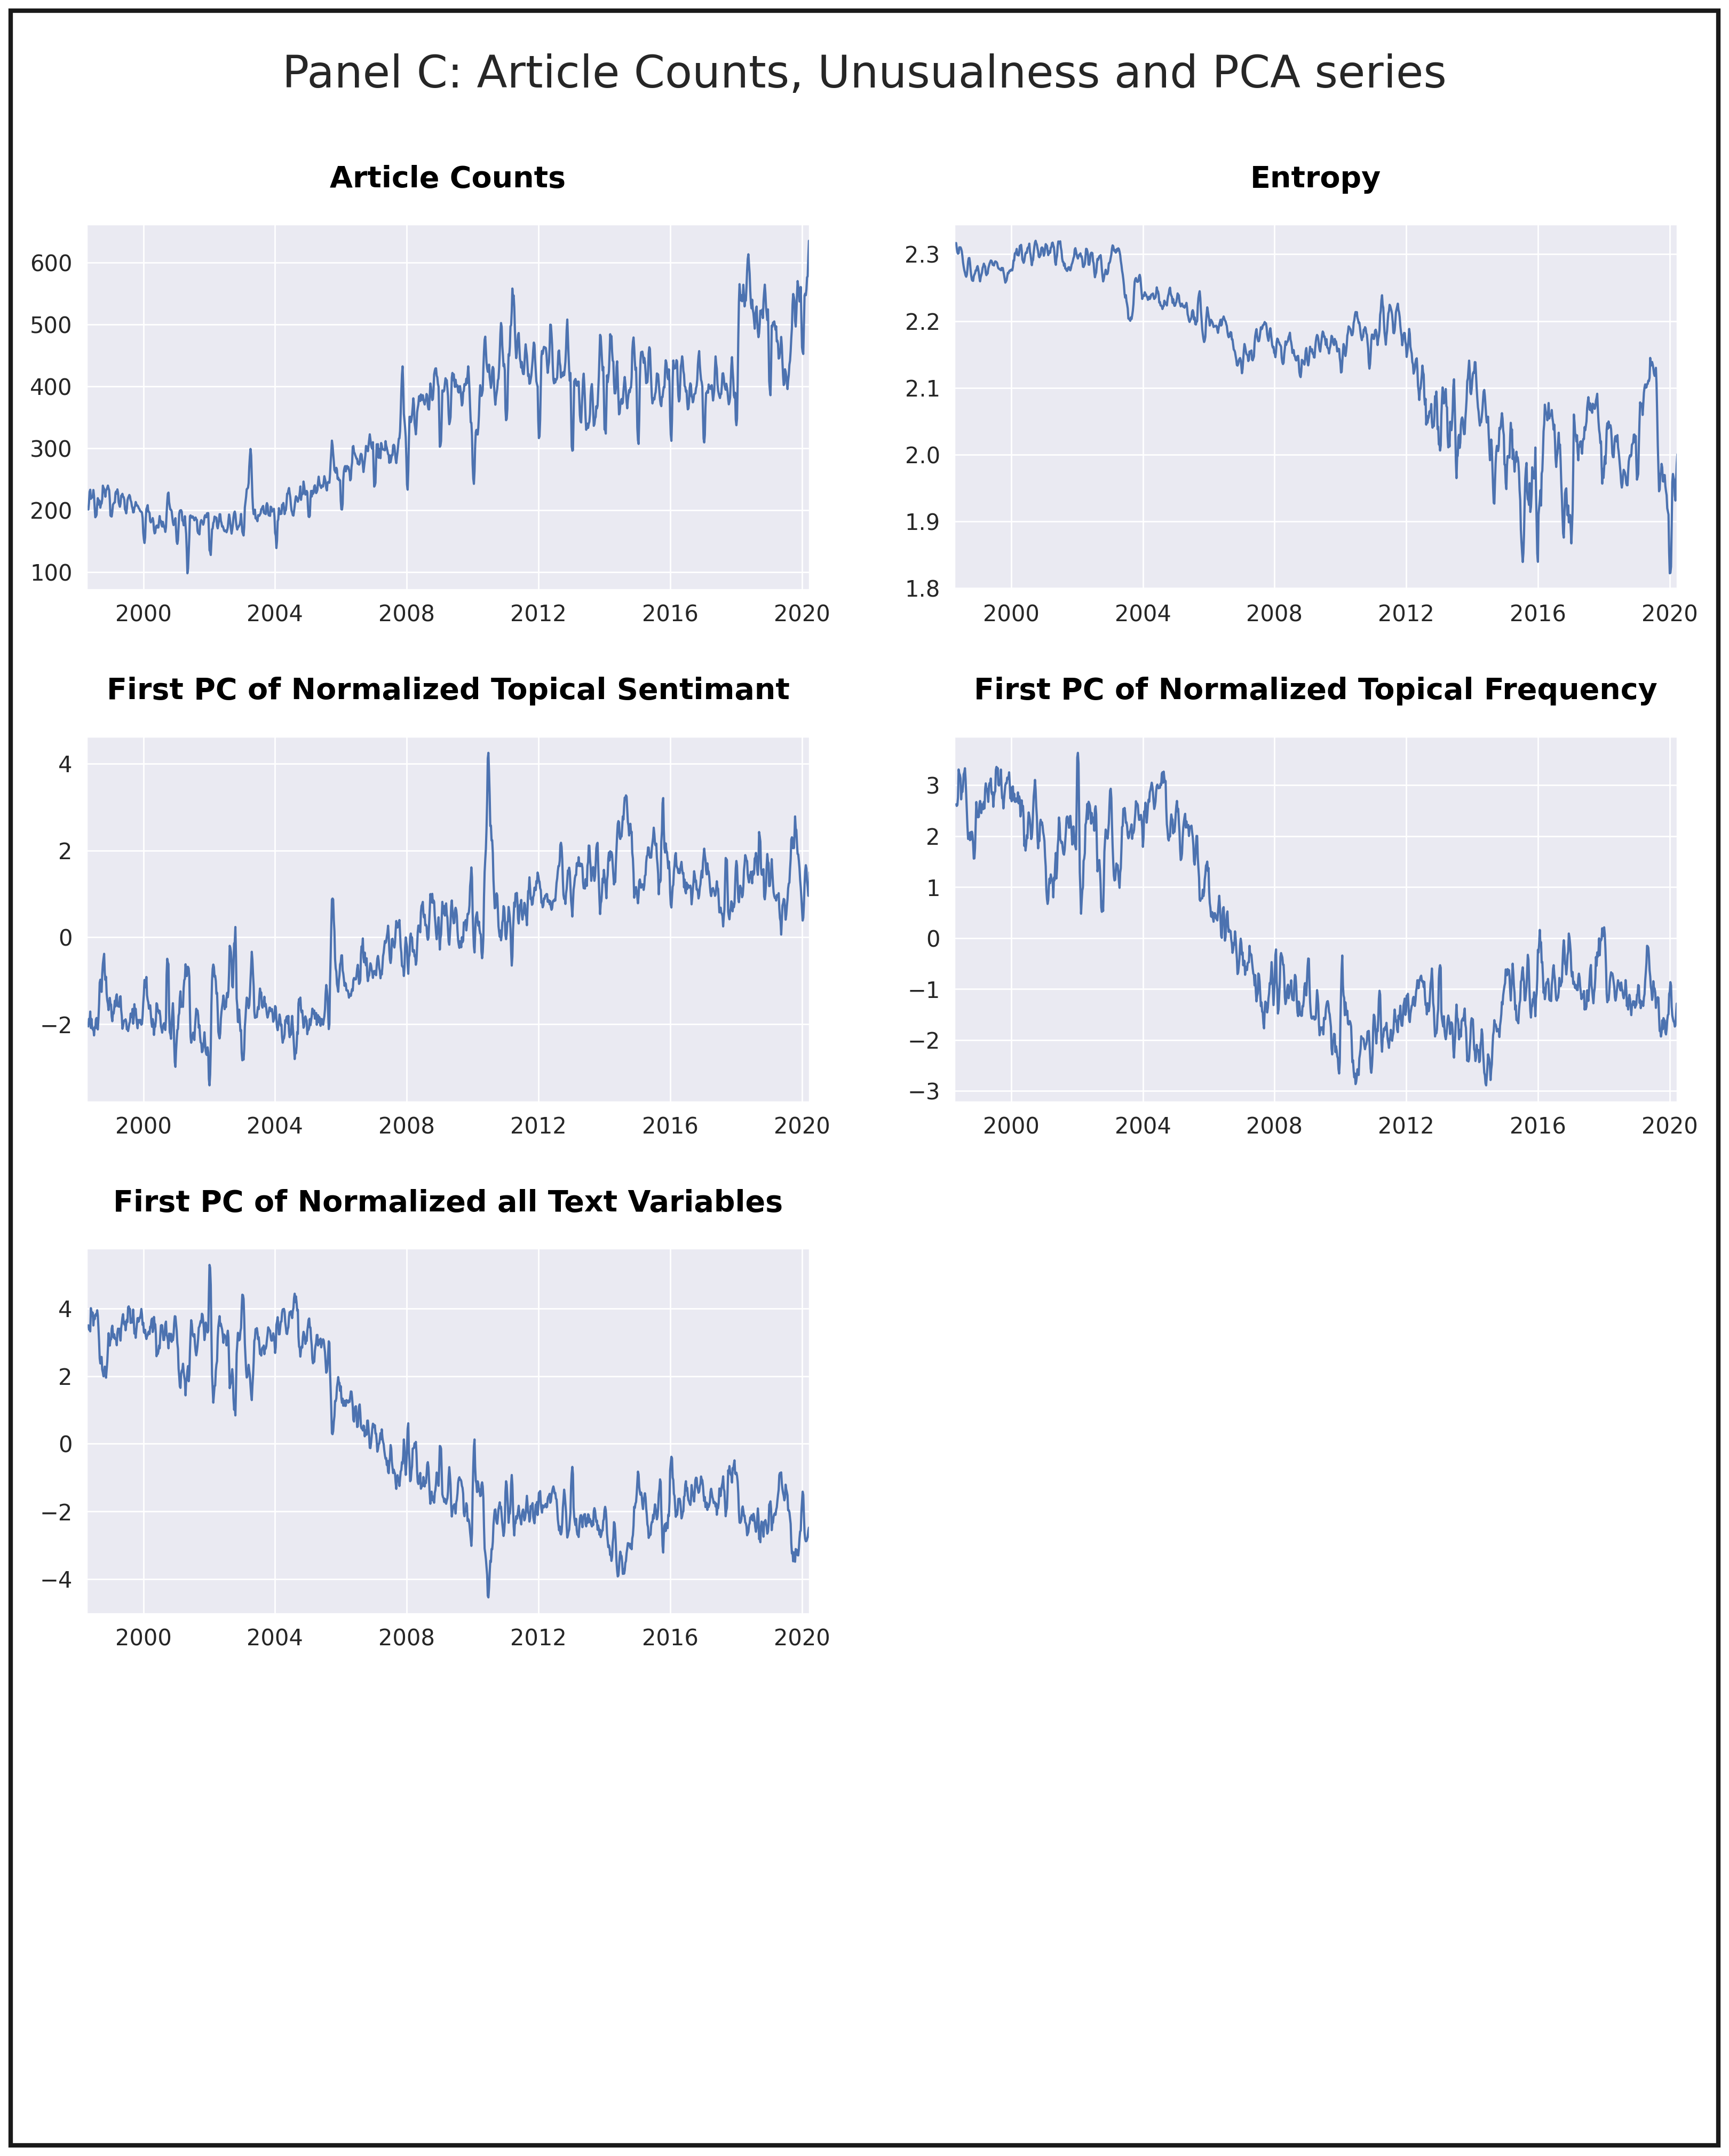

In [3]:
main()

# new topic model (mod)

- construct Table III
- document and clean github (put codes into __archive__)

In [2]:
event_dates = {'1':(('2000-07-29','2000-09-23'),'UK fuel protests'),
               '2':(('2010-05-05','2010-06-16'),'BP oil spill aftermath on global market'),
               '3':(('2010-05-05','2010-06-16'),'BP oil spill aftermath on distribution'),
               '4':(('2011-11-07','2012-07-05'),"Dynegy's bankruptcy"),
               '5':(('2002-12-02','2003-03-30'),'Venezuelan general strike'),
               '6':(('2018-01-20','2019-10-11'),'Trade war supply shock'),  
               '7':(('2002-01-01','2002-02-28'),'Pemexgate'),   
}
# Single dates:
# event_dates = {'1':('2000-09-20','UK fuel protests'),
#                '2':('2010-06-16','BP oil spill aftermath on global market'),
#                '3':('2010-06-16','BP oil spill aftermath on distribution'),
#                '4':('2012-07-04',"Dynegy's bankruptcy"),
#                '5':('2002-12-11','Venezuelan general strike'),
#                '6':('2019-09-04','Trade war supply shock'),  
#                '7':('2002-02-13','Pemexgate'),   
# }

df_headlines_list = []
event_title_list = []

old2new = {'Env':'Dist', 'Epg':'Ge'}
new_var_list = [old2new.get(item, item) for item in var_list]
def get_event_title(topic, event_dates):
    (start_date, end_date), event_title = event_dates[str(topic)]
    return f"{new_var_list[topic-1]}: {event_title} from {start_date} to {end_date}"

In [5]:
# https://en.wikipedia.org/wiki/Fuel_protests_in_the_United_Kingdom#Timeline_and_effects
topic = 1
event_title_list.append(get_event_title(topic, event_dates))
df_headlines = get_headlines(df_all, topic, event_dates, top=3)
df_headlines.sort_values('date', inplace=True)
display(df_headlines)
df_headlines_list.append(df_headlines)

sentiment   entropy      date   
194797  -0.115385  2.298195  20000912  \
194917  -0.092437  2.360878  20000913   
195554  -0.098214  2.335806  20000920   

                                                 headline  
194797   UK's Blair to hold urgent talks over fuel crisis  
194917  EU asks Belgium for information on trucks protest  
195554  Worries over fuel supply delay UK sugar proces...

In [6]:
# BP oil spill aftermath on global market
topic = 2
event_title_list.append(get_event_title(topic, event_dates))

df_headlines = get_headlines(df_all, topic, event_dates, top=160)
word_list = ['BP', 'spil']
df_headlines = pd.concat([df_headlines[df_headlines['headline'].str.contains(word, case=False, na=False)] 
                          for word in word_list])
df_headlines.drop_duplicates(inplace=True)
df_headlines.sort_values('date', inplace=True)
display(df_headlines)
df_headlines_list.append(df_headlines)

sentiment   entropy      date   
864466  -0.128378  2.271015  20100518  \
872797  -0.073333  2.384223  20100603   
873170  -0.073529  2.394664  20100608   

                                                 headline  
864466  Goldman, BP sued over alleged SemGroup conspiracy  
872797      Biden acknowledges message lapse on oil spill  
873170  BREAKINGVIEWS-Did Goldman sabotage BP's blowou...

In [7]:
# BP oil spill aftermath on distribution
topic = 3
event_title_list.append(get_event_title(topic, event_dates))

df_headlines = get_headlines(df_all, topic, event_dates, top=250)
word_list = ['BP', 'spil']
df_headlines = pd.concat([df_headlines[df_headlines['headline'].str.contains(word, case=False, na=False)] 
                          for word in word_list])
df_headlines.drop_duplicates(inplace=True)
df_headlines.sort_values('date', inplace=True)

# df_headlines['headline'].iloc[0] = df_headlines['headline'].iloc[0][:51]
# print(df_headlines['headline'].iloc[0])
display(df_headlines)
df_headlines_list.append(df_headlines)

sentiment   entropy      date   
873022  -0.067797  2.403666  20100607  \
871007  -0.015385  2.533532  20100609   
873965  -0.021531  2.262218  20100616   

                                                 headline  
873022          U.S. EPA hands tied on tough BP sanctions  
871007  Global fossil fuel CO2 falls, 1st time since '...  
873965  STOCKS NEWS US-Pride Int'l: rev to be hit if B...

In [8]:
# Dynegy's bankruptcy 
# https://en.wikipedia.org/wiki/Dynegy#2012_bankruptcy
topic = 4
event_title_list.append(get_event_title(topic, event_dates))

df_headlines = get_headlines(df_all, topic, event_dates, top=100)
word_list = ['Dynegy']
df_headlines = pd.concat([df_headlines[df_headlines['headline'].str.contains(word, case=False, na=False)] 
                           for word in word_list])
df_headlines.drop_duplicates(inplace=True)
df_headlines.sort_values('date', inplace=True)
df_headlines.drop(index=[1065908,1065983], inplace=True) # repeated entries
display(df_headlines)
df_headlines_list.append(df_headlines)

sentiment   entropy      date   
1065907  -0.116071  2.380752  20120309  \
1068487  -0.113514  2.280921  20120312   
1068860  -0.090909  2.306779  20120316   

                                                  headline  
1065907  Dynegy bankruptcy examiner faults company deal...  
1068487  US govt seeks bankruptcy trustee for Dynegy Ho...  
1068860  UPDATE 1-Dynegy disappointed with examiner's r...

In [9]:
# Venezuelan general strike
# https://en.wikipedia.org/wiki/Venezuelan_general_strike_of_2002%E2%80%932003
topic = 5
event_title_list.append(get_event_title(topic, event_dates))

df_headlines = get_headlines(df_all, topic, event_dates, top=35)
word_list = ['Venezuela', 'strike']
df_headlines = pd.concat([df_headlines[df_headlines['headline'].str.contains(word, case=False, na=False)] 
                           for word in word_list])
df_headlines.drop_duplicates(inplace=True)
df_headlines.sort_values('date', inplace=True)
df_headlines.drop(index=[314414], inplace=True) # repeated entries
display(df_headlines)
df_headlines_list.append(df_headlines)

sentiment   entropy      date   
305304  -0.042453  2.419813  20030129  \
305515  -0.051546  2.402821  20030131   
314427  -0.070796  2.316315  20030307   

                                                 headline  
305304       US Cash Crudes -Weaker on margins, Venezuela  
305515  US Cash Crudes - Weaker as Venezuela increases...  
314427  Venezuela Cerro Negro project shuts syncrude unit

In [10]:
# Asian Petrochemical Expansion / Trade War Supply Shock
# https://en.wikipedia.org/wiki/China%E2%80%93United_States_trade_war#2019
topic = 6
event_title_list.append(get_event_title(topic, event_dates))

df_headlines = get_headlines(df_all, topic, event_dates, top=250)
word_list = ['trade war', 'U.S.-China', 'US-China']
df_headlines = pd.concat([df_headlines[df_headlines['headline'].str.contains(word, case=False, na=False)] 
                           for word in word_list])

df_headlines.drop_duplicates(inplace=True)
df_headlines.sort_values('date', inplace=True)

# df_headlines['headline'].iloc[1] = df_headlines['headline'].iloc[1][11:]
# print(df_headlines['headline'].iloc[1])
display(df_headlines)
df_headlines_list.append(df_headlines)

sentiment   entropy      date   
1706115  -0.040373  2.096719  20180620  \
1813288  -0.049793  2.449383  20190709   
1812825  -0.055336  2.400910  20190731   

                                                  headline  
1706115  HK shares end higher as ZTE surge calms trade ...  
1813288  UPDATE 2-BASF slashes 2019 outlook, blames U.S...  
1812825  China chemical crackdown hurting more than tra...

In [11]:
# Pemex
# https://en.wikipedia.org/wiki/Pemexgate
topic = 7
event_title_list.append(get_event_title(topic, event_dates))

df_headlines = get_headlines(df_all, topic, event_dates, top=10)
word_list = ['pemex']
df_headlines = pd.concat([df_headlines[df_headlines['headline'].str.contains(word, case=False, na=False)] 
                           for word in word_list])

df_headlines.drop_duplicates(inplace=True)
df_headlines.sort_values('date', inplace=True)
display(df_headlines)
df_headlines_list.append(df_headlines)

sentiment   entropy      date   
258553  -0.077778  2.378040  20020124  \
258843  -0.055556  2.351105  20020130   
262051  -0.078947  2.347647  20020218   

                                                 headline  
258553    Mexico Pemex graft scandal spilled over borders  
258843  Ex-director of Mexico Pemex denies misuse of f...  
262051  Probe into Mexico Pemex graft scandal points t...

In [12]:
df_list = []
for event_title, df_headlines in zip(event_title_list, df_headlines_list):
    df_event = pd.DataFrame({'sentiment':['',''], 
                             'entropy':['',''], 
                             'date':['',''], 
                             'headline':['',f'\\underline{{{event_title}}}']})
    df_list.extend([df_event, df_headlines])
df = pd.concat(df_list)



df.columns = ['Sentiment', 'Entropy', 'Date', 'Headlines']
df_latex = df.to_latex(index=False, column_format='cccl',
                       formatters={'Sentiment': format_float, 
                                   'Entropy': format_float, 
                                   'Date': int_to_date})
for col in df.columns:
    df_latex = df_latex.replace(col, f'\\textbf{{{col}}}', 1)
print(df_latex)

\begin{tabular}{cccl}
\toprule
\textbf{Sentiment} & \textbf{Entropy} & \textbf{Date} & \textbf{Headlines} \\
\midrule
 &  &  &  \\
 &  &  & \underline{Co: UK fuel protests from 2000-07-29 to 2000-09-23} \\
-0.115 & 2.298 & 9/12/2000 & UK's Blair to hold urgent talks over fuel crisis \\
-0.092 & 2.361 & 9/13/2000 & EU asks Belgium for information on trucks protest \\
-0.098 & 2.336 & 9/20/2000 & Worries over fuel supply delay UK sugar processing \\
 &  &  &  \\
 &  &  & \underline{Gom: BP oil spill aftermath on global market from 2010-05-05 to 2010-06-16} \\
-0.128 & 2.271 & 5/18/2010 & Goldman, BP sued over alleged SemGroup conspiracy \\
-0.073 & 2.384 & 6/3/2010 & Biden acknowledges message lapse on oil spill \\
-0.074 & 2.395 & 6/8/2010 & BREAKINGVIEWS-Did Goldman sabotage BP's blowout preventer? \\
 &  &  &  \\
 &  &  & \underline{Dist: BP oil spill aftermath on distribution from 2010-05-05 to 2010-06-16} \\
-0.068 & 2.404 & 6/7/2010 & U.S. EPA hands tied on tough BP sanctions \\
-0

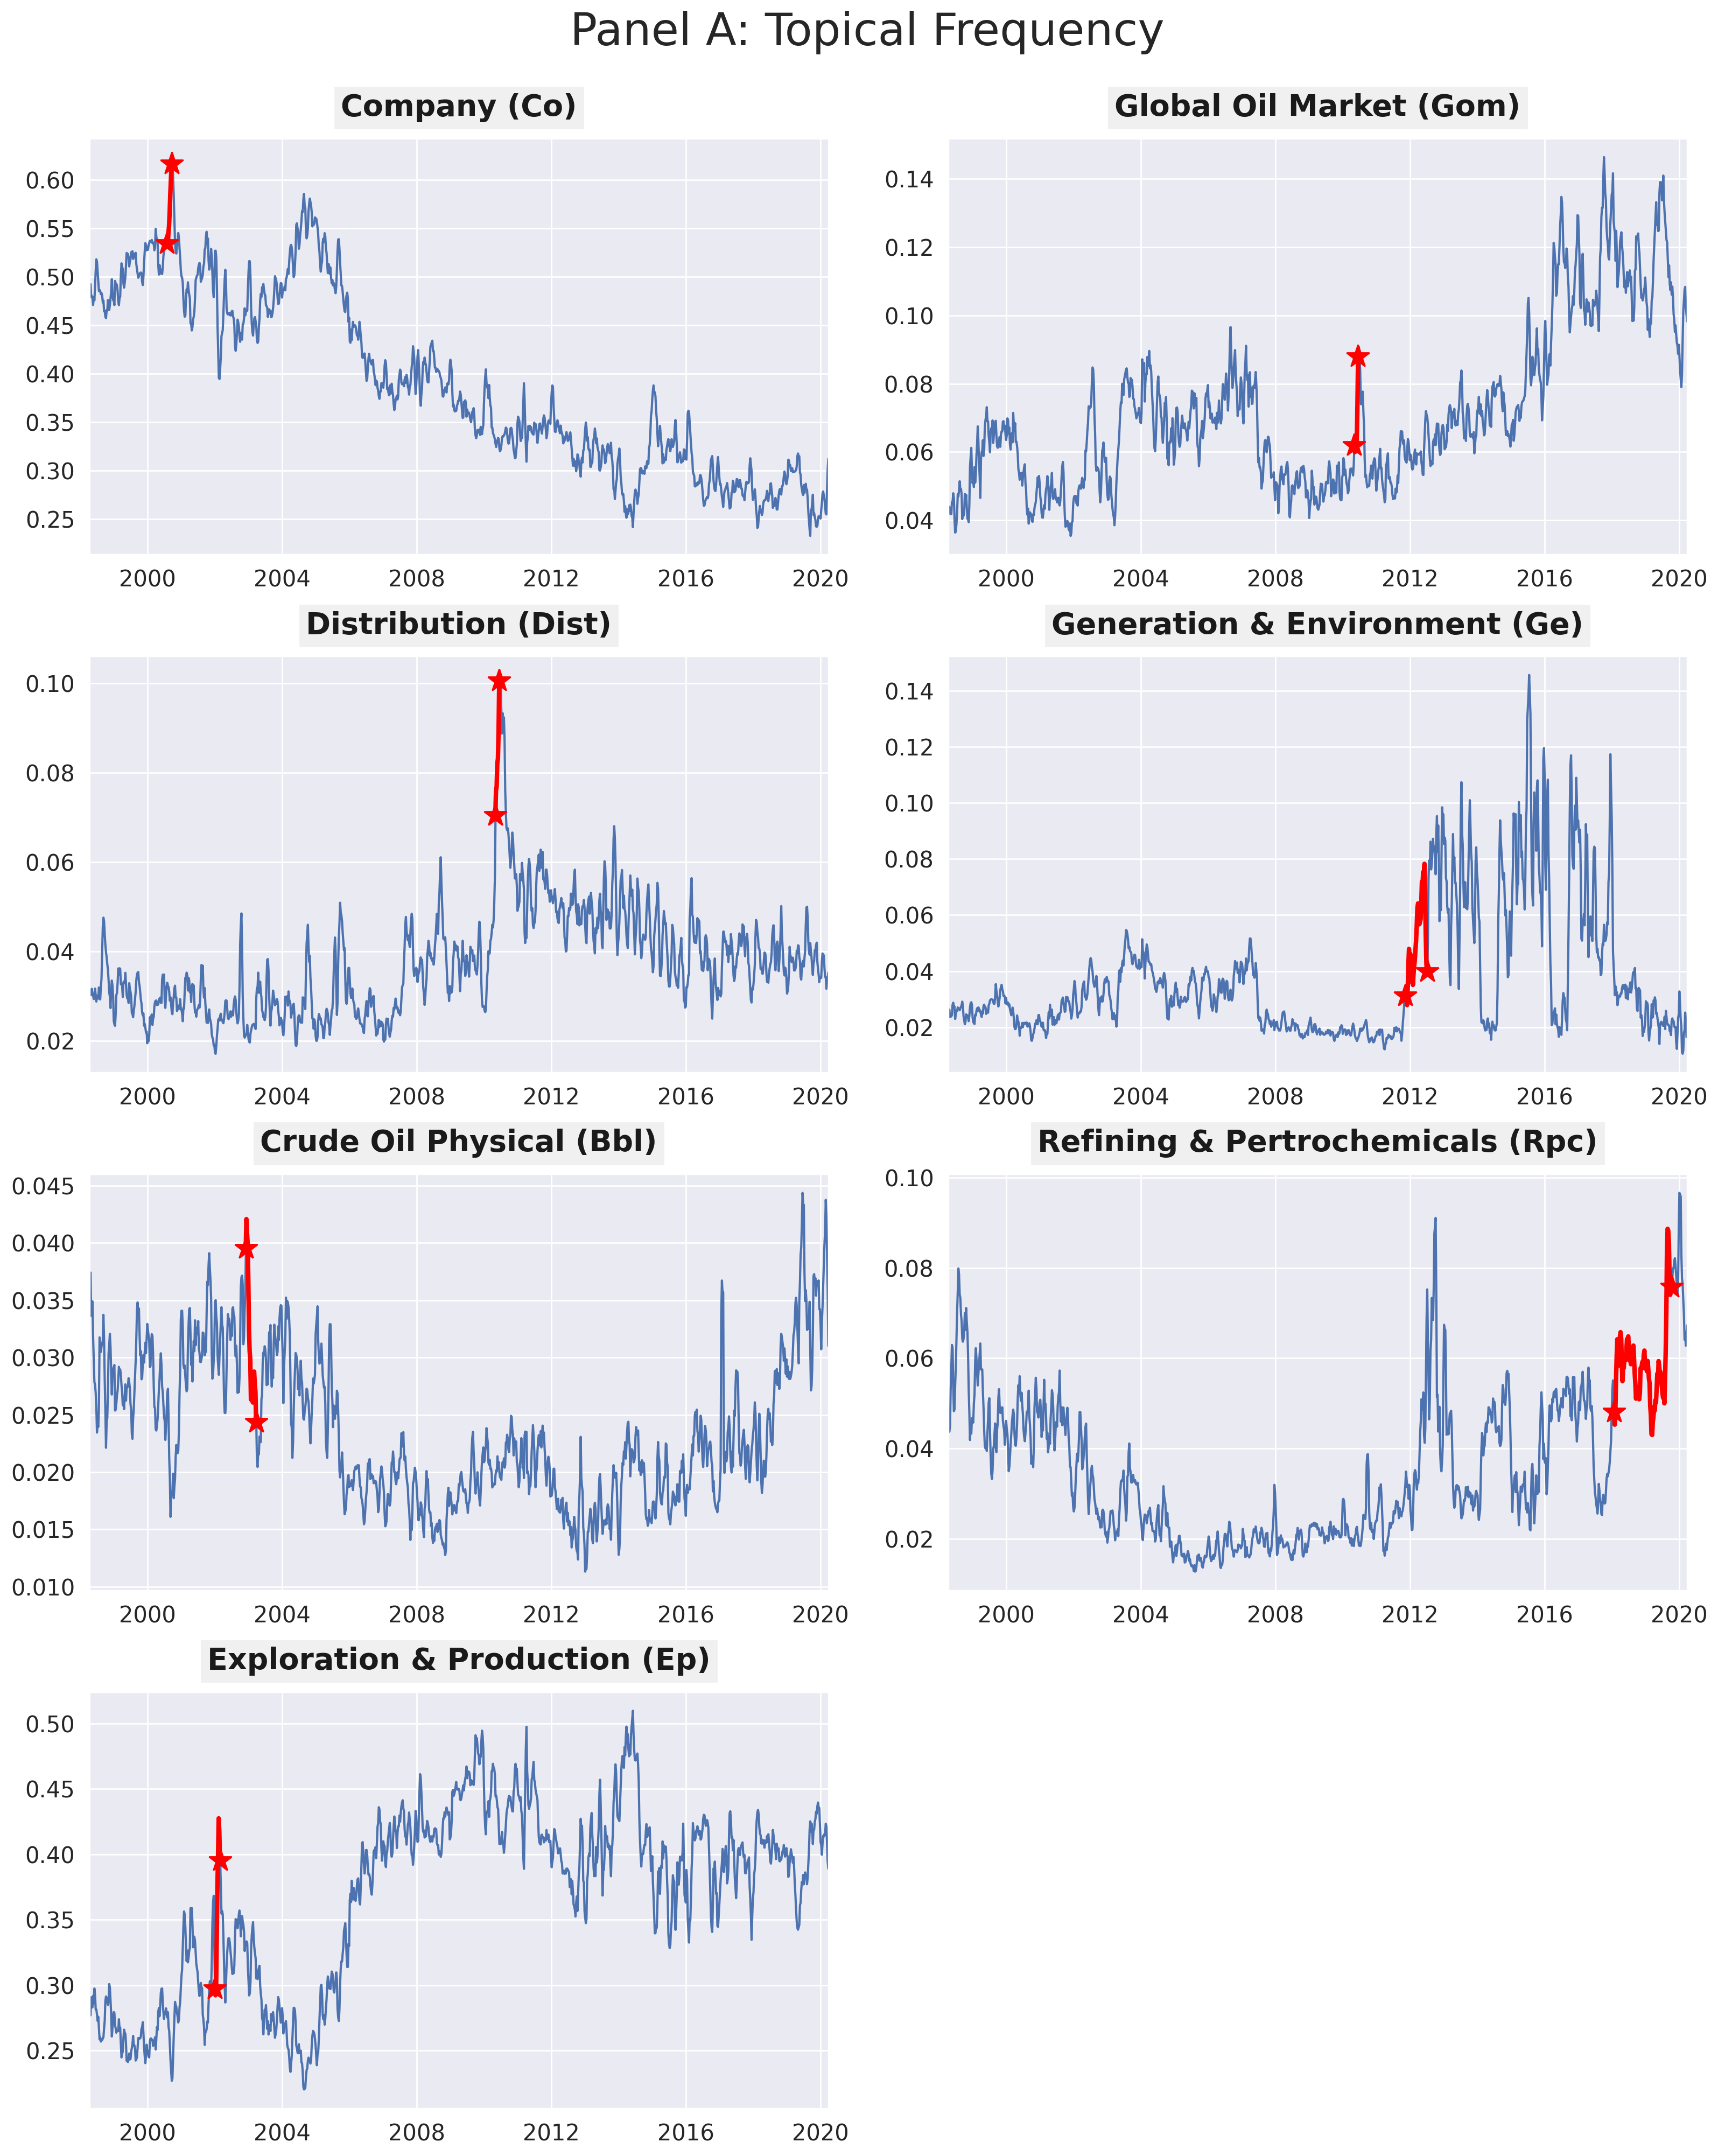

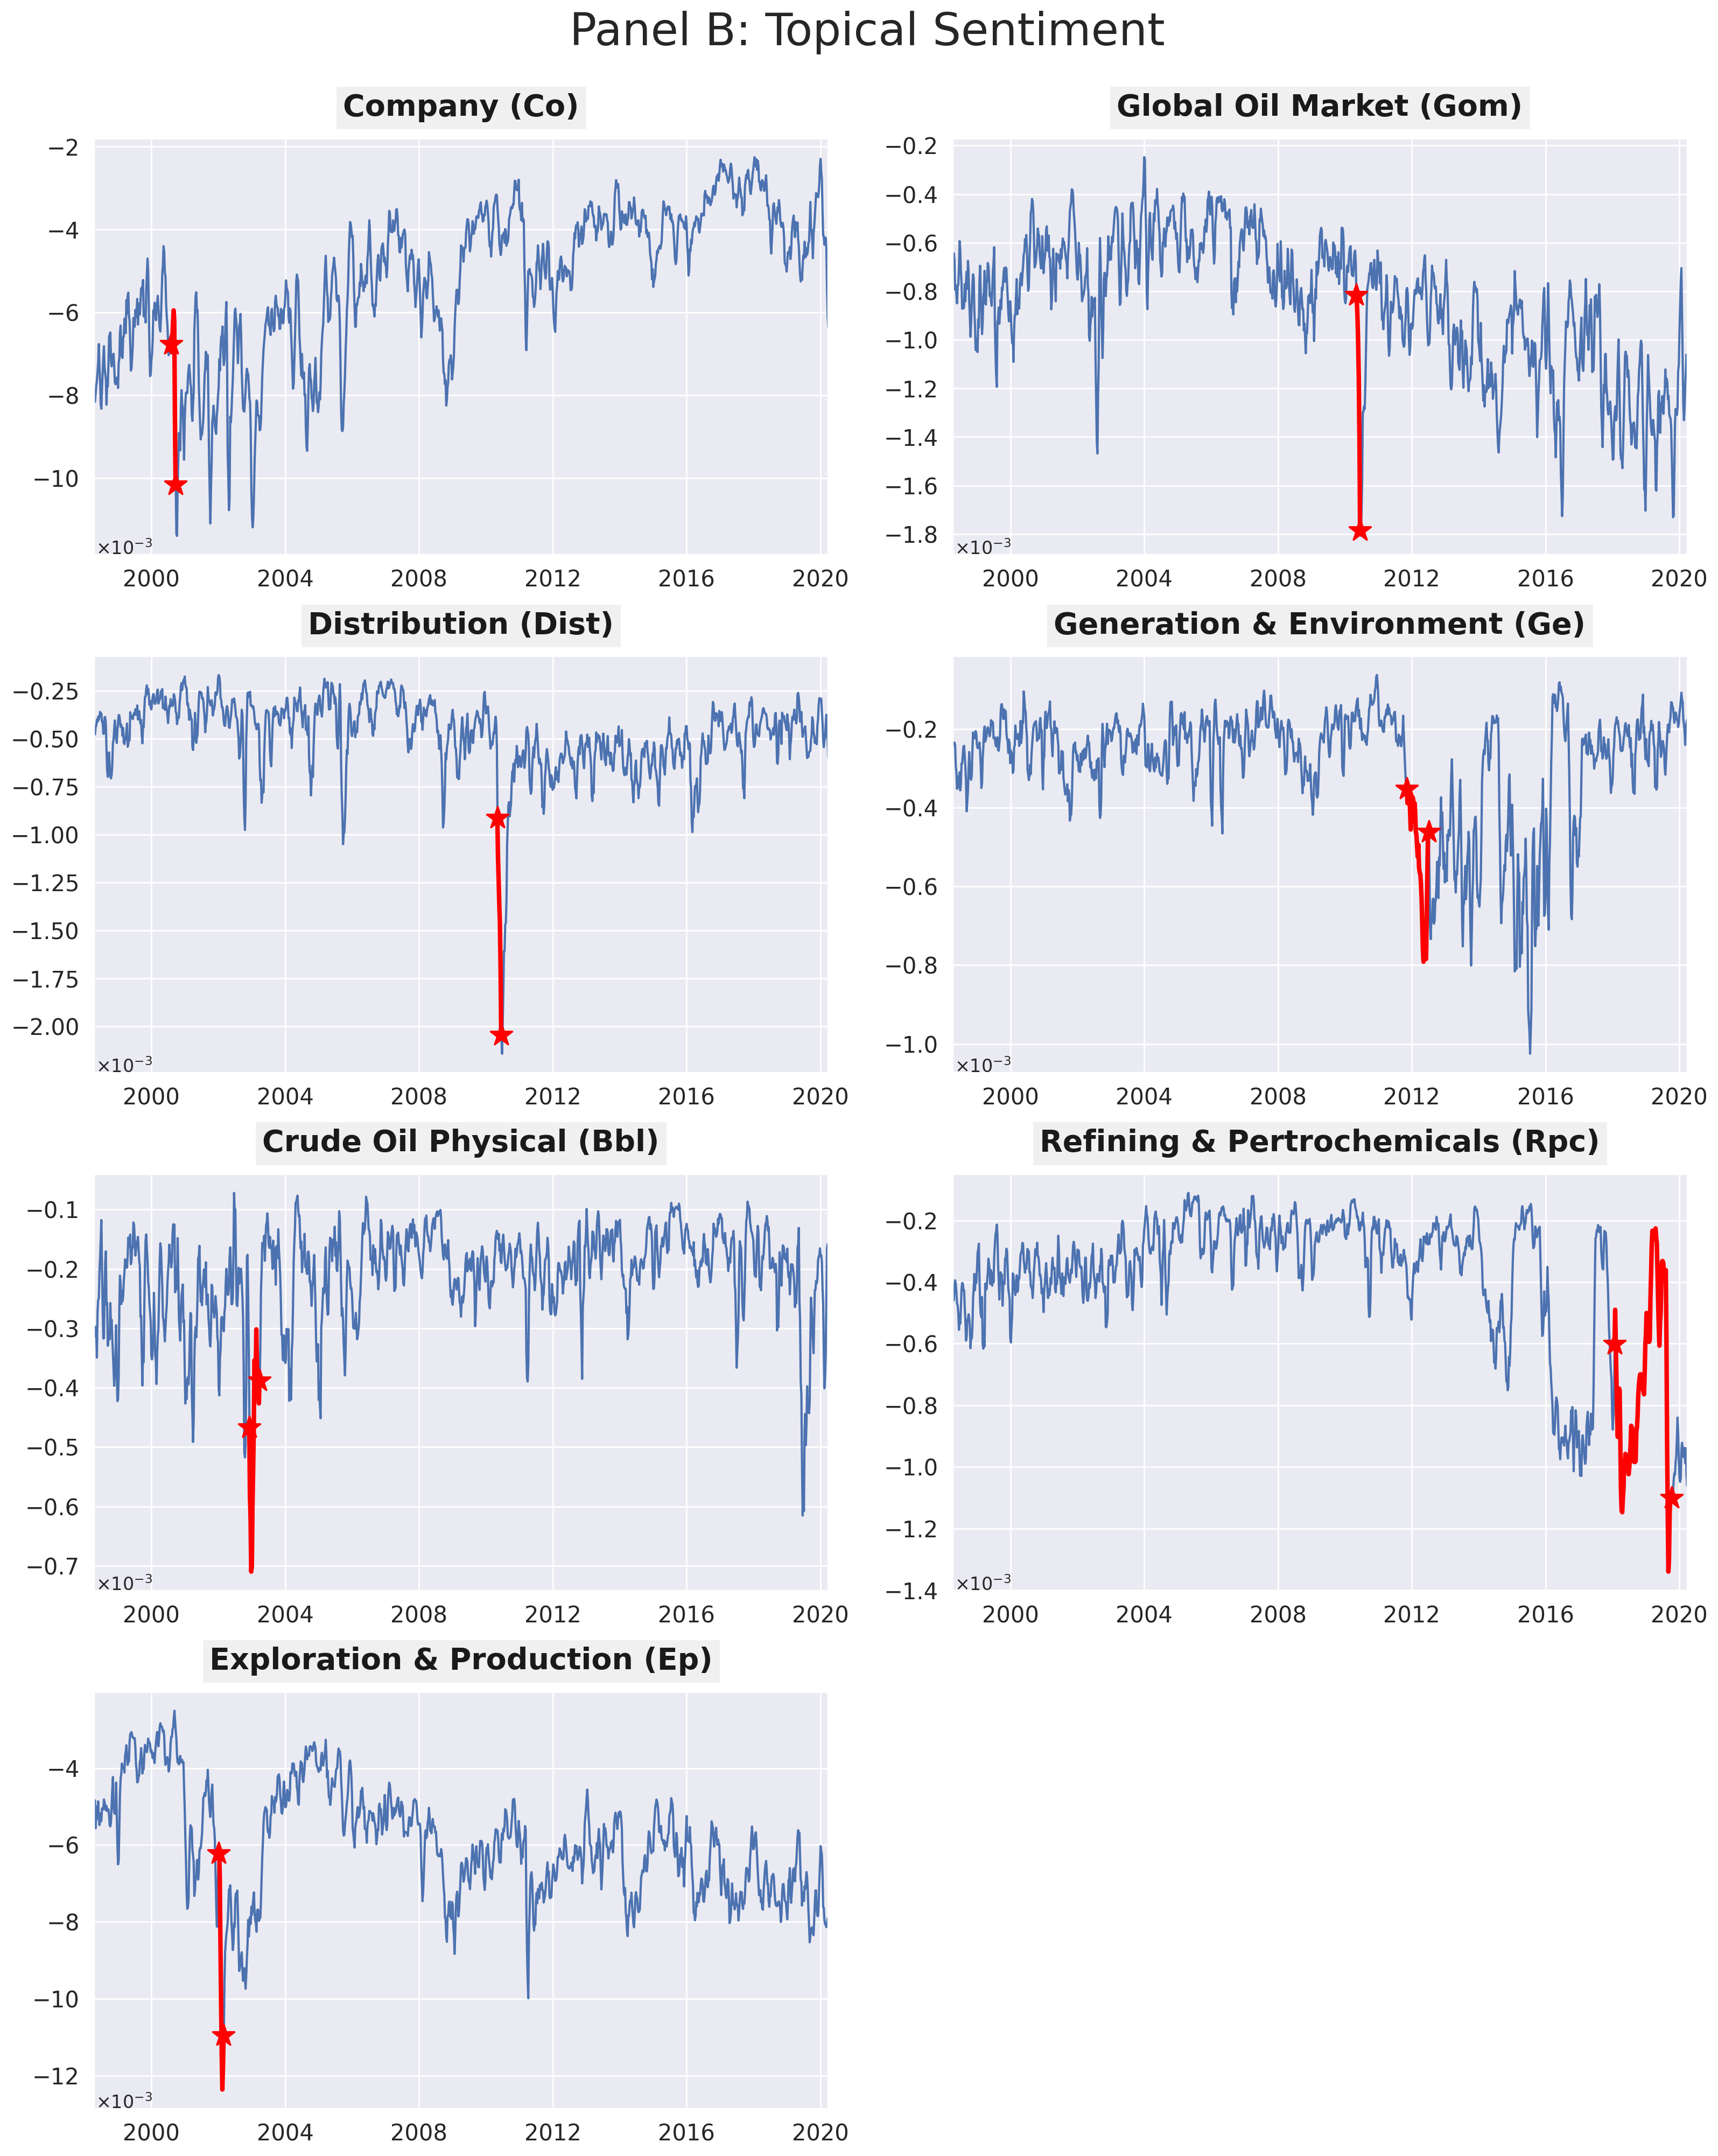

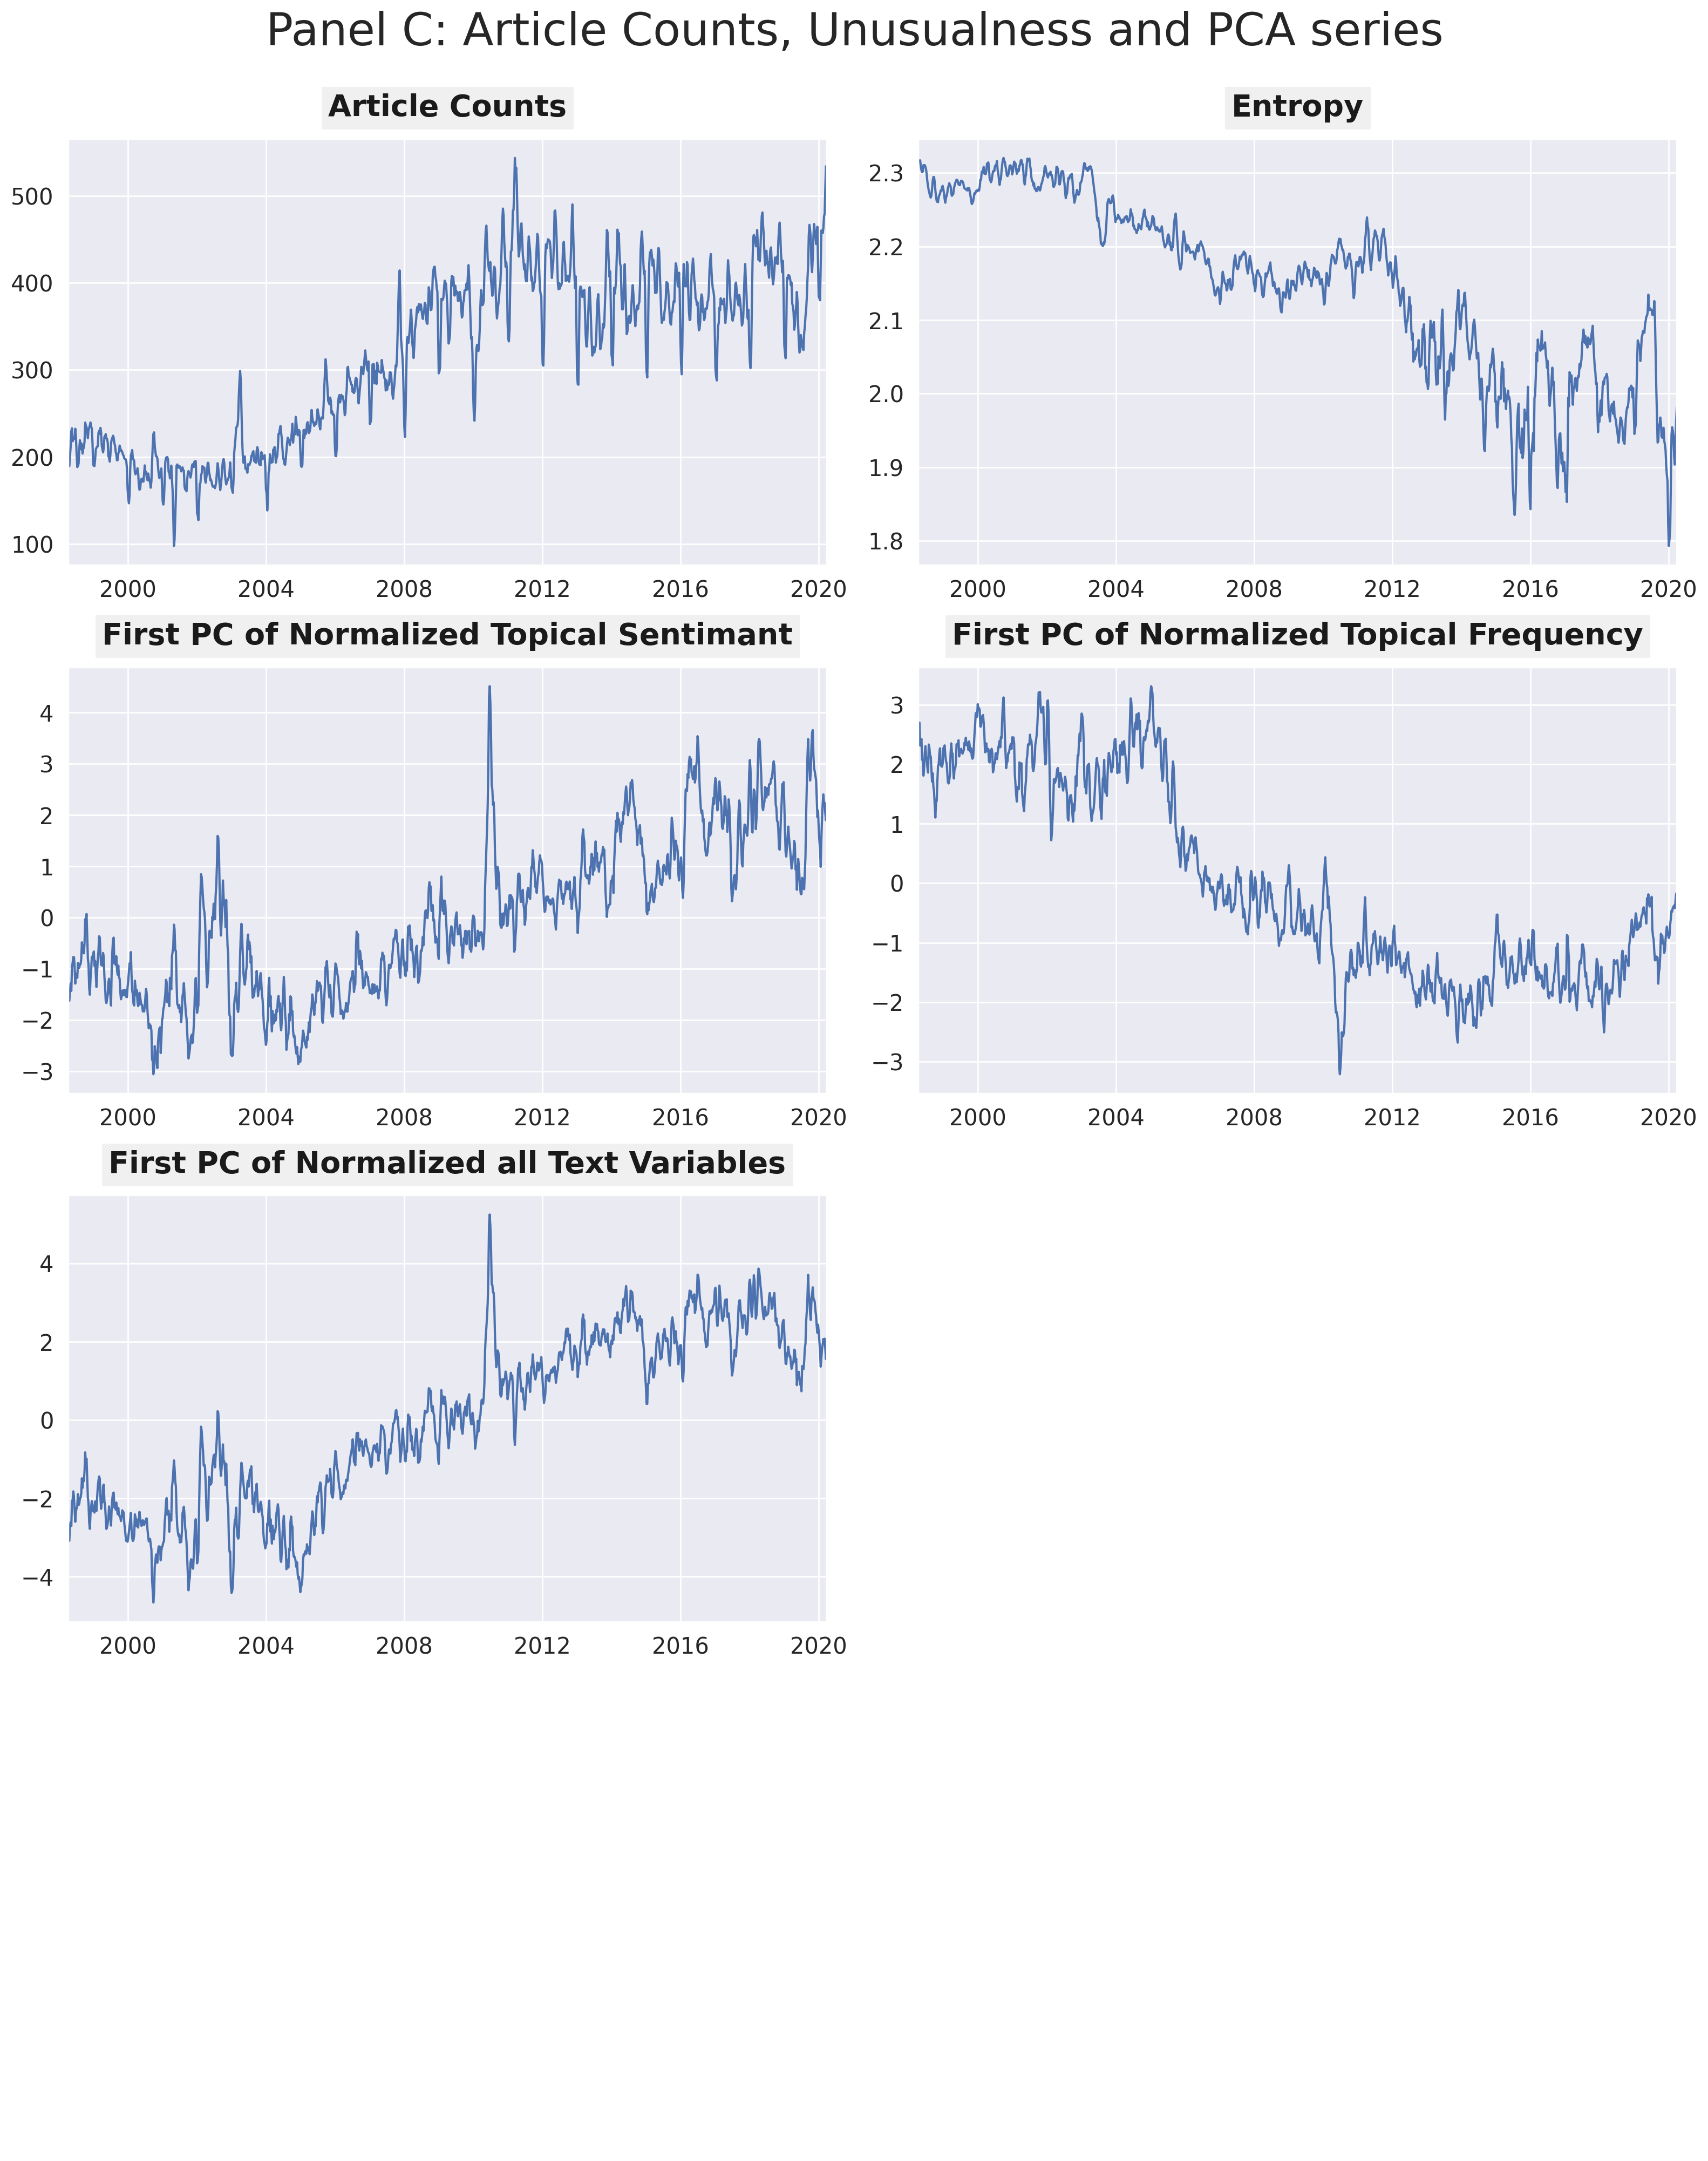

In [3]:
dataset = get_dataset('transformed_data_prices_v19.2_mod.dta')
plot_freq(dataset, event_dates)
plot_sent(dataset, event_dates)
plot_others(dataset)